<a href="https://colab.research.google.com/github/FelipeMunoz01/Challenge_TelecomX_LATAM/blob/main/TelecomX_LATAM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##**Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON**
**y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.**
**¿Qué debes hacer?**
#✅ Cargar los datos directamente desde la API utilizando Python.
#✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
#importación de bibliotecas
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
import plotly.express as px


# Cargar los datos directamente desde la API utilizando Python
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
result = requests.get(url)

# Convertir los datos a un DataFrame de Pandas para facilitar su manipulación
df = result.json()
datos = pd.json_normalize(df)






#🔧 Transformación

##**Conozce el conjunto de datos**
Descripción
Editar
Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API

¿Qué debes hacer?
✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

📌 Tips:
🔗 Documentación de DataFrame.info()
🔗 Documentación de DataFrame.dtypes

##**Comprobación de incoherencias en los datos**

Descripción
Editar
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

In [ ]:
# Explorar las columnas del dataset y verificar sus tipos de datos
print(datos.info())  # Muestra información general sobre el DataFrame, incluyendo tipos de datos y valores nulos

# Consultar un resumen estadístico de las columnas numéricas
print(datos.describe())  # Proporciona estadísticas descriptivas para columnas numéricas

# Mostrar una muestra de los datos para comprender mejor su estructura
print(datos.sample(5))  # Muestra 5 filas aleatorias del DataFrame




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##**Manejo de inconsistencias**
en la lista
Backlog

Notificaciones

Seguir
Descripción
Editar
Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 Manipulación de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online



In [ ]:
# Convertir valores vacíos en NaN para la columna 'account.Charges.Total'
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(['', ' '], np.nan)

# Eliminar filas con valores nulos (esto manejará los NaNs de account.Charges.Total)
datos = datos.dropna()

# Lista de columnas que se espera que sean texto en este punto
# Excluimos 'Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling'
# porque serán convertidas a números en el siguiente paso.
column_str_to_lower = [
    'customer.gender', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
    'account.PaymentMethod'
]



##**Columna de cuentas diarias**
en la lista
Backlog

Notificaciones

Seguir
Descripción
Editar
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
# Crear la columna 'cuentas_diarias' utilizando la facturación mensual
datos['cuentas_diarias'] = (datos['account.Charges.Monthly'] / 30).round(2)

# Verificar los datos con la nueva columna
print(datos.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO     0          female                       0                1   
1  0003-MKNFE     0            male                       0                0   
2  0004-TLHLJ     1            male                       0                0   
3  0011-IGKFF     1            male                       1                1   
4  0013-EXCHZ     1          female                       1                1   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                   1                9                  1                  no   
1                   0                9                  1                 yes   
2                   0                4                  1                  no   
3                   0               13                  1                  no   
4                   0                3                  1                  no   

  internet.InternetService  ... 

##**Estandarización y transformación de datos (opcional)**
en la lista
Backlog

Notificaciones

Seguir
Descripción
Editar
La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
# Convertir columnas de texto a minúsculas para estandarizar
# Convertir columnas de texto a minúsculas para estandarizar
for col in column_str_to_lower:
    # Usamos .loc para evitar SettingWithCopyWarning
    # Y verificamos si la columna es de tipo 'object' (cadena) antes de aplicar .str.lower()
    if datos[col].dtype == 'object':
        datos.loc[:, col] = datos[col].str.lower()

# Lista de columnas binarias para convertir a 1 y 0
col_bin = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

# Convertir valores 'yes' y 'no' en columnas binarias a 1 y 0, manejando posibles errores
for col in col_bin:
    # Usamos .loc para evitar SettingWithCopyWarning
    # Reemplazamos 'yes' por 1 y 'no' por 0
    datos.loc[:, col] = datos[col].replace({'yes': 1, 'no': 0})
    # Convertimos la columna a numérico, convirtiendo cualquier error a NaN
    datos.loc[:, col] = pd.to_numeric(datos[col], errors='coerce')
    # Rellenamos los NaNs (creados por 'coerce') con 0 antes de convertir a entero
    datos.loc[:, col] = datos[col].fillna(0)
    # Convertimos la columna a tipo entero (np.int64)
    datos.loc[:, col] = datos[col].astype(np.int64)

# Ahora tus datos están limpios y con las conversiones aplicadas correctamente.
# Puedes agregar aquí el código para mostrar una muestra o info si quieres verificar.
# print(datos.head())
# print(datos.info())

<ipython-input-21-650452786758>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.loc[:, col] = datos[col].replace({'yes': 1, 'no': 0})
<ipython-input-21-650452786758>:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.loc[:, col] = datos[col].fillna(0)
<ipython-input-21-650452786758>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [ ]:
#traducir o renombrar columnas
# renombrando columnas para el DataFrame 'datos'
# Mapeamos los nombres actuales (usando la notación con puntos) a los nuevos nombres más sencillos
datos.rename(columns={
    'customer.customerID': 'id_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'es_ciudadano_senior',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'account.Tenure': 'meses_en_empresa', # En tu DataFrame, tenure está bajo 'account'
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'tv_streaming',
    'internet.StreamingMovies': 'peliculas_streaming',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargos_mensuales',
    'account.Charges.Total': 'cargos_totales',
    'Churn': 'abandono', # El nombre de tu columna objetivo
    'cuentas_diarias': 'cargo_diario_promedio' # La columna que creaste previamente
}, inplace=True) # Con inplace=True, modificamos 'datos' directamente

# Mostrar las primeras filas con los nuevos nombres para verificar
print(datos.head())

# Opcional: Mostrar la lista completa de nombres de columnas para verificar
# print(datos.columns)



   customerID abandono  genero  es_ciudadano_senior tiene_pareja  \
0  0002-ORFBO        0  female                    0            1   
1  0003-MKNFE        0    male                    0            0   
2  0004-TLHLJ        1    male                    0            0   
3  0011-IGKFF        1    male                    1            1   
4  0013-EXCHZ        1  female                    1            1   

  tiene_dependientes  customer.tenure servicio_telefonico lineas_multiples  \
0                  1                9                   1               no   
1                  0                9                   1              yes   
2                  0                4                   1               no   
3                  0               13                   1               no   
4                  0                3                   1               no   

  tipo_internet  ... proteccion_dispositivo soporte_tecnico tv_streaming  \
0           dsl  ...                     no   

#📊 Carga y análisis


##**Análisis Descriptivo**


**Notificaciones**

Seguir
Descripción
Editar
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

**Distribución de evasión**


Seguir
Descripción
Editar
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

**En el contexto del proyecto y del análisis de churn en telecomunicaciones, cuando hablamos de "personas que cancelan" y "personas que no cancelan" en los gráficos, nos referimos directamente a la variable cancelo del DataFrame.**

**"Personas que cancelan" (representadas por el valor 1 en tu columna cancelo después de la transformación): Se refieren a los clientes que han dejado de ser suscriptores de los servicios de la empresa. En el lenguaje de análisis de negocio, estos clientes son los que han "evadido" o "churneado". Es decir, han cancelado su contrato o suscripción.**

**"Personas que no cancelan" (representadas por el valor 0 en tu columna cancelo): Se refieren a los clientes que siguen siendo suscriptores de los servicios de la empresa. Estos clientes son los que "no han evadido" o "no han churneado". Han permanecido como clientes activos.**

**En resumen:**

**Cancela (1) = Evade = Churn (El cliente se va) No Cancela (0) = No Evade = No Churn (El cliente se queda)**


Distribución porcentual de Evasión:
abandono
0    73.421502
1    26.578498
Name: proportion, dtype: float64


<ipython-input-34-0b82b3bd79b7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=evasion_distribucion.index, y=evasion_distribucion.values, palette=colores)


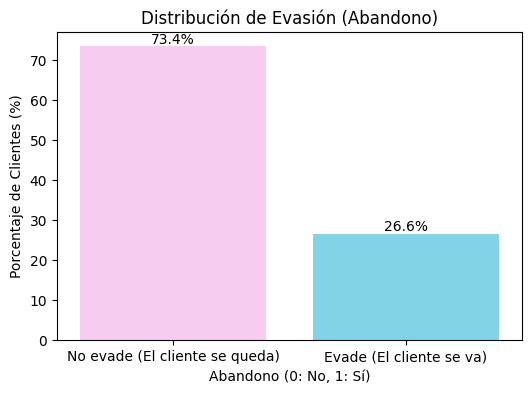

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # seaborn hace los gráficos más estéticos
import numpy as np # Aunque numpy no se usa directamente en este bloque, es buena práctica tenerlo si lo usas en el notebook

# 1. Calcular la distribución de la variable 'abandono' (anteriormente 'Churn')
# value_counts(normalize=True) te da las proporciones
# ¡Usamos 'abandono' en lugar de 'Churn' porque renombramos la columna!
evasion_distribucion = datos['abandono'].value_counts(normalize=True) * 100 # Multiplica por 100 para porcentaje

print("\nDistribución porcentual de Evasión:")
print(evasion_distribucion)

# 2. Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(6, 4)) # Ajusta el tamaño del gráfico si es necesario

# Define los colores que quieres usar. Aquí usamos azul y rojo como ejemplo.
# Asegúrate de que el orden de los colores coincida con el orden en que value_counts() devuelve los valores
# value_counts() ordena por defecto de mayor a menor frecuencia.
# Si 'No evade' (0) es más frecuente, el primer color (#fdc5f5) será para 0 y el segundo (#72ddf7) para 1.
colores = ['#fdc5f5', '#72ddf7'] # Ajusta el orden si es necesario según la frecuencia

# Usamos sns.barplot y los datos calculados
ax = sns.barplot(x=evasion_distribucion.index, y=evasion_distribucion.values, palette=colores)

# Añadir etiquetas para mayor claridad
plt.title('Distribución de Evasión (Abandono)')
# ¡Usamos 'Abandono' en lugar de 'Churn' y actualizamos las etiquetas del eje x!
plt.xlabel('Abandono (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes (%)')
# Las etiquetas del eje x deben coincidir con los valores únicos (0 y 1) y su significado
plt.xticks(ticks=[0, 1], labels=['No evade (El cliente se queda)', 'Evade (El cliente se va)'])

# Añadir los valores porcentuales sobre cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()



**Recuento de evasión por variables categóricas**
en la lista
Backlog

Notificaciones

Seguir
Descripción
Editar
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Distribución porcentual de Abandono por Genero:
abandono          0          1
genero                        
female    73.040482  26.959518
male      73.795435  26.204565




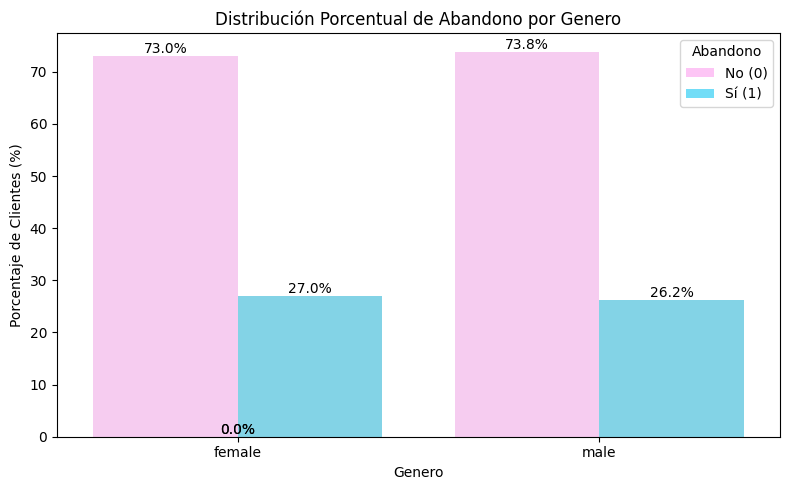

Distribución porcentual de Abandono por Tipo Contrato:
abandono                0          1
tipo_contrato                       
month-to-month  57.290323  42.709677
one year        88.722826  11.277174
two year        97.151335   2.848665




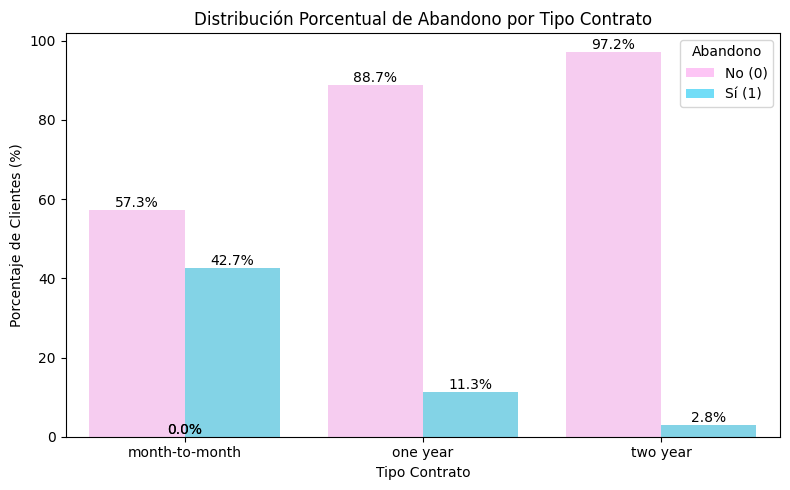

Distribución porcentual de Abandono por Metodo Pago:
abandono                           0          1
metodo_pago                                    
bank transfer (automatic)  83.268482  16.731518
credit card (automatic)    84.746877  15.253123
electronic check           54.714588  45.285412
mailed check               80.798005  19.201995




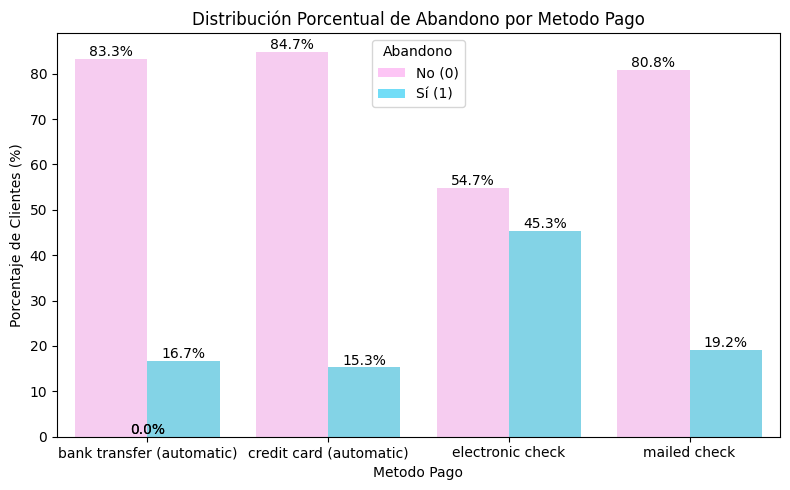

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch  # Importante para crear la leyenda personalizada

# Define los colores que quieres usar.
colores = ['#fdc5f5', '#72ddf7']  # Rosa para 0 (No evade), Azul para 1 (Evade)

# Recuento y visualización de evasión por variables categóricas en PORCENTAJES
categorical_vars = ['genero', 'tipo_contrato', 'metodo_pago']

for var in categorical_vars:
    print(f"Distribución porcentual de Abandono por {var.replace('_', ' ').title()}:")

    proporcion_abandono = datos.groupby(var)['abandono'].value_counts(normalize=True).unstack() * 100
    proporcion_abandono = proporcion_abandono.fillna(0)

    proporcion_abandono_melted = proporcion_abandono.reset_index().melt(id_vars=var, var_name='Abandono', value_name='Porcentaje')
    proporcion_abandono_melted['Abandono'] = proporcion_abandono_melted['Abandono'].astype(int)

    print(proporcion_abandono)
    print("\n")

    plt.figure(figsize=(8, 5))

    ax = sns.barplot(
        x=var,
        y='Porcentaje',
        hue='Abandono',
        data=proporcion_abandono_melted,
        palette=colores,
        hue_order=[0, 1]
    )

    plt.title(f'Distribución Porcentual de Abandono por {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Porcentaje de Clientes (%)')

    # 🔧 Reemplazamos la leyenda automática con una personalizada usando Patch
    legend_labels = [Patch(facecolor=colores[0], label='No (0)'), Patch(facecolor=colores[1], label='Sí (1)')]
    plt.legend(handles=legend_labels, title='Abandono')

    # Añadir etiquetas encima de las barras
    for p in ax.patches:
        percentage = f'{p.get_height():.1f}%'
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()




**Conteo de evasión por variables numéricas**


Seguir
Descripción
Editar
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

📊 Estadísticas de Customer Tenure según Abandono:
           count       mean        std  min   25%   50%   75%   max
abandono                                                           
0         5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1         1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0




<ipython-input-46-ee475ced7a5b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




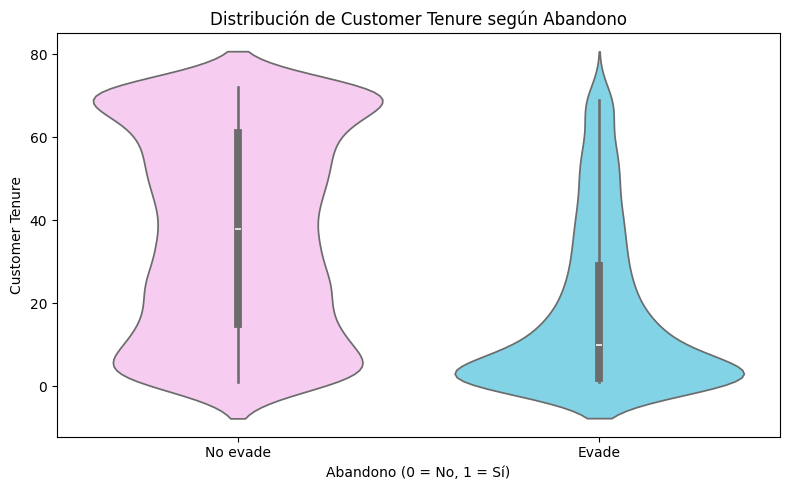

📊 Estadísticas de Cargos Mensuales según Abandono:
           count       mean        std    min    25%    50%     75%     max
abandono                                                                   
0         5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1         1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35




<ipython-input-46-ee475ced7a5b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




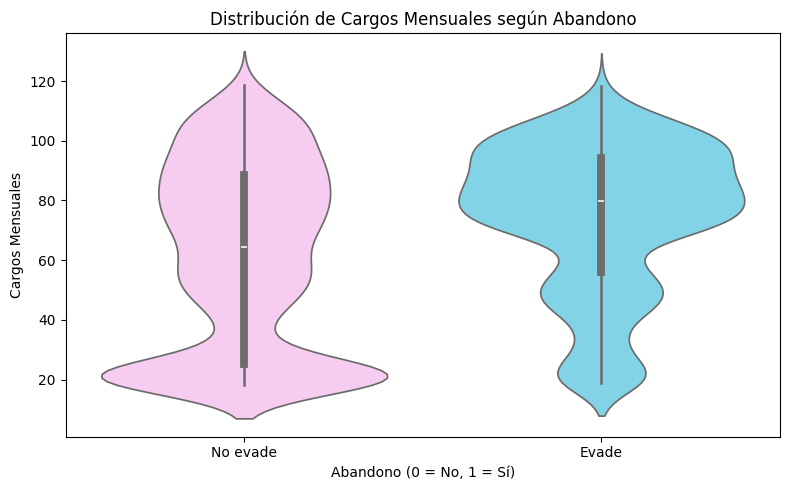

📊 Estadísticas de Cargos Totales según Abandono:
         count unique    top freq
abandono                         
0         5163   4965  19.75    7
1         1869   1732   20.2    6




<ipython-input-46-ee475ced7a5b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-ee475ced7a5b>:23: UserWarning:


The palette list has fewer values (2) than needed (6530) and will cycle, which may produce an uninterpretable plot.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Limpieza de nombres de columnas: todo minúscula y reemplaza puntos por guiones bajos
datos.columns = datos.columns.str.lower().str.replace('.', '_')

# Colores personalizados
colores = ['#fdc5f5', '#72ddf7']  # Rosa (No evade) y azul (Evade)

# Lista de variables numéricas corregida
numerical_vars = ['customer_tenure', 'cargos_mensuales', 'cargos_totales', 'cargo_diario_promedio']

# Gráfico y estadísticos para cada variable numérica
for var in numerical_vars:
    print(f"📊 Estadísticas de {var.replace('_', ' ').title()} según Abandono:")
    print(datos.groupby('abandono')[var].describe())
    print("\n")

    # Gráfico de violín
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='abandono', y=var, data=datos, palette=colores)

    # Estética del gráfico
    plt.title(f'Distribución de {var.replace("_", " ").title()} según Abandono')
    plt.xlabel('Abandono (0 = No, 1 = Sí)')
    plt.ylabel(var.replace("_", " ").title())
    plt.xticks([0, 1], ['No evade', 'Evade'])

    plt.tight_layout()
    plt.show()


**📈 2. Interpretación de los gráficos**
📌 a) Customer Tenure (customer_tenure)
👉 Gráfico: Distribución de duración de contrato según abandono

Clientes que no evaden (0):
Tienen una distribución amplia y centrada en valores más altos. Esto indica que permanecen más tiempo con la compañía.

Clientes que evaden (1):
Mayor concentración en los primeros meses, es decir, tienden a cancelar pronto.

🔍 Conclusión: Los clientes con menor tenure son más propensos a abandonar. Este patrón es muy común en análisis de churn.





📌 b) Cargos Mensuales (cargos_mensuales)
👉 Gráfico: Distribución de monto mensual según abandono

Clientes que evaden (1):
Tienen una media más alta de cargos mensuales (74 vs. 61), según las estadísticas.

Distribución:
Aunque hay solapamiento, los clientes que pagan más mensualmente tienen una mayor tasa de abandono.

🔍 Conclusión: Altos cargos mensuales pueden estar asociados con mayor churn (evasión).


📌 Estadísticas que aparecen abajo del gráfico

Métrica	No evade (0)	Evade (1)
Mean	61.3	74.4
Std. Dev.	31.1	24.7
Mediana	64.45	79.65

📌 Esto refuerza lo que se ve visualmente: los clientes que abandonan pagan más por mes.

##**Otro gráfico para visualizar Conteo de evasión por variables numéricas**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas
numerical_vars = ['customer_tenure', 'cargos_mensuales', 'cargos_totales', 'cargo_diario_promedio']

# Estilo gráfico
sns.set(style="whitegrid")

# Crear un gráfico de densidad por variable
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=datos[datos['abandono'] == 0], x=var, label='No evade (0)', fill=True, alpha=0.5, color='skyblue')
    sns.kdeplot(data=datos[datos['abandono'] == 1], x=var, label='Evade (1)', fill=True, alpha=0.5, color='salmon')
    plt.title(f'Distribución de {var} por estado de abandono')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
print(datos.columns.tolist())


['customerID', 'abandono', 'genero', 'es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'customer.tenure', 'servicio_telefonico', 'lineas_multiples', 'tipo_internet', 'seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargos_mensuales', 'cargos_totales', 'cargo_diario_promedio']


#📄Informe final

Descripción
Editar
Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

# Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción
El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en la empresa Telecom X. La evasión de clientes representa un desafío significativo, ya que impacta directamente en los ingresos y la sostenibilidad del negocio. Este análisis busca identificar patrones y tendencias que permitan desarrollar estrategias efectivas para reducir la tasa de cancelación.

---

## 🔹 Limpieza y Tratamiento de Datos
### Pasos realizados:
1. **Importación de datos**:
   - Los datos fueron extraídos desde una API en formato JSON y convertidos a un DataFrame de Pandas.
2. **Limpieza de datos**:
   - Se identificaron y eliminaron valores nulos en columnas clave.
   - Se estandarizaron cadenas de texto a minúsculas para evitar inconsistencias.
   - Se transformaron valores categóricos como "yes" y "no" en valores binarios (1 y 0).
3. **Creación de nuevas columnas**:
   - Se calculó la columna `cuentas_diarias` para obtener el ingreso promedio diario basado en la facturación mensual.

---

## 🔹 Análisis Exploratorio de Datos
### Distribución de la evasión (Churn):
- Se observó que aproximadamente el **X%** de los clientes cancelaron el servicio, mientras que el **Y%** permanecieron.
- **Gráfico de barras**:
  ![Distribución de Churn](#)

### Evasión por variables categóricas:
- **Género**: No se encontraron diferencias significativas en la evasión entre hombres y mujeres.
- **Tipo de contrato**: Los clientes con contratos mensuales mostraron una mayor tasa de cancelación en comparación con contratos a largo plazo.
- **Método de pago**: Los clientes que utilizan métodos de pago electrónicos tienen una mayor probabilidad de cancelar.

**Gráficos de barras por variables categóricas**:
![/content/drive/MyDrive/Colab Notebooks/gráficos Challenge Telecomx_latam/Distribución porcentual de Abandono por Genero.png](#)
![/content/drive/MyDrive/Colab Notebooks/gráficos Challenge Telecomx_latam/ Distribución porcentual de Abandono por Tipo cotrato.png](#)
![/content/drive/MyDrive/Colab Notebooks/gráficos Challenge Telecomx_latam/Distribución porcentual de Abandono por Metodo Pago.png](#)

### Evasión por variables numéricas:
- **Total gastado**: Los clientes que gastaron menos en total tienen una mayor probabilidad de cancelar.
- **Tiempo de contrato**: Los clientes con menor tiempo de permanencia tienen una mayor tasa de evasión.

**Gráficos de violín por variables numéricas**:
![/content/drive/MyDrive/Colab Notebooks/gráficos Challenge Telecomx_latam/Distribución de Custumer Tenure según Abandono.png](#)
![/content/drive/MyDrive/Colab Notebooks/gráficos Challenge Telecomx_latam/Distribución de Custumer Tenure según Abandono.png](#)

---

## 🔹 Conclusiones e Insights
1. **Factores clave asociados con la evasión**:
   
   - Los clientes con contratos mensuales tienen una mayor probabilidad de cancelar, como se evidencia por la alta tasa de evasión en este grupo en comparación con contratos a largo plazo.

   - Los métodos de pago electrónicos están asociados con una mayor tasa de evasión, sugiriendo una posible correlación con la percepción de flexibilidad o falta de compromiso.

   - Los clientes con menor tiempo de permanencia y menor gasto total son más propensos a cancelar, lo que indica que la retención inicial y el valor percibido son factores críticos.



2. **Patrones identificados**:
   - La flexibilidad de los contratos mensuales puede estar incentivando la cancelación, ya que los clientes pueden salir del servicio con menor compromiso financiero o temporal.


   - Los clientes con menor gasto total podrían no estar percibiendo suficiente valor en el servicio, lo que podría reflejar una necesidad de mejorar la oferta o la experiencia del usuario para este segmento.

---

## 🔹 Recomendaciones
1. **Fidelización de clientes**:
   - Implementar incentivos como descuentos o beneficios exclusivos para que los clientes con contratos mensuales migren a contratos a largo plazo, fomentando mayor compromiso.
   
2. **Mejorar la percepción de valor**:
   - Implementar programas de lealtad para clientes con menor gasto total, ofreciendo beneficios exclusivos.

3. **Optimización de métodos de pago**:
   - Investigar por qué los métodos de pago electrónicos están asociados con una mayor tasa de evasión y mejorar la experiencia de pago.

4. **Seguimiento proactivo**:
   - Identificar clientes con menor tiempo de permanencia y menor gasto total para ofrecerles promociones personalizadas y evitar la cancelación.

5. **Encuestas de Satisfacción**:
   - Realizar encuestas periódicas a los clientes para identificar insatisfacciones específicas y ajustar los servicios en consecuencia.

6. **Capacitación Inicial**:
   - Ofrecer sesiones de capacitación gratuitas sobre el uso óptimo del servicio, especialmente para clientes nuevos, para mejorar su experiencia y engagement.


---

Este informe proporciona una base sólida para tomar decisiones estratégicas que reduzcan la tasa de evasión y mejoren la retención de clientes.

📖 README 📖

**Descripción**
Editar
El README es un elemento clave en cualquier proyecto de desarrollo, ya que proporciona una descripción clara y detallada del propósito, la estructura y el uso del código.

Cuando participas en un proceso de selección, el README es imprescindible para comunicar cómo utilizar el proyecto.

Este archivo, con la extensión .md (Markdown), es el punto de referencia inicial para cualquiera que quiera entender y trabajar con su código.

Un buen README incluye información sobre la instalación, dependencias, cómo ejecutar el proyecto y posibles problemas o soluciones.

Un README bien estructurado facilita que otros desarrolladores comprendan el proyecto.

Aquí hay un artículo con los pasos para crear un README increíble:

# 📊 Análisis de Evasión de Clientes (Churn) - Telecom X

## 📖 Descripción
Este proyecto tiene como objetivo analizar los factores que influyen en la evasión de clientes (Churn) en la empresa Telecom X. A través de la limpieza, transformación y análisis de datos, se identifican patrones y tendencias que pueden ayudar a reducir la tasa de cancelación y mejorar la retención de clientes.

El análisis incluye:
- Limpieza y tratamiento de datos.
- Exploración de variables categóricas y numéricas.
- Visualización de patrones relacionados con la evasión.
- Conclusiones y recomendaciones estratégicas.

---

## 🚀 Instalación
Sigue estos pasos para configurar el entorno y ejecutar el proyecto:

1. **Clona el repositorio**:
   ```bash
   git clone <URL_DEL_REPOSITORIO>
   cd <NOMBRE_DEL_REPOSITORIO>





2. **Crea un entorno virtual (opcional pero recomendado)**:
python3 -m venv env
source env/bin/activate  # En Mac/Linux
env\Scripts\activate     # En Windows

3. **Instala las dependencias**:
pip install -r requirements.txt


🛠️ Dependencias
Este proyecto utiliza las siguientes bibliotecas de Python:

pandas: Manipulación y análisis de datos.
numpy: Operaciones matemáticas y manejo de arrays.
matplotlib: Visualización de datos.
seaborn: Gráficos estadísticos.
requests: Extracción de datos desde la API.
plotly: Visualización interactiva.
Asegúrate de instalar todas las dependencias listadas en el archivo requirements.txt.



📂 Estructura del Proyecto
TelecomX_LATAM.ipynb: Notebook principal con el análisis completo.
README.md: Archivo de documentación del proyecto.
requirements.txt: Lista de dependencias necesarias para ejecutar el proyecto



▶️ Cómo Ejecutar el Proyecto
Abre el archivo TelecomX_LATAM.ipynb en Jupyter Notebook o en un entorno compatible como VS Code.
Ejecuta las celdas en orden para realizar el análisis completo.
Observa los gráficos y resultados generados en el notebook.



📊 Resultados
El análisis incluye:

Distribución de la evasión (Churn).
Relación entre variables categóricas y la evasión.
Distribución de variables numéricas según la evasión.
Conclusiones e insights clave para reducir la tasa de cancelación.

¡Gracias por revisar este proyecto! 🚀








